Osnabrück University - Machine Learning (Summer Term 2023) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Leila Malihi

# Exercise Sheet 04: Clustering

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, May 14, 2023**. If you need help (and Google and other resources were not enough), use the StudIP forum, contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

In the following tasks we will be relying on numpy. Using the following import we expect it to be in global scope as `np`. Therefore we can, after executing the following cell, use stuff like `np.array` and `np.sqrt`. Check out the [NumPy Reference](http://docs.scipy.org/doc/numpy/reference/index.html) and especially search it using e.g. [Google Site Search](https://www.google.de/search?q=array+site%3Adocs.scipy.org%2Fdoc%2Fnumpy)! You can also try `np.lookfor('keyword search docstrings')` to get help.

In [1]:
import numpy as np
np.lookfor('get array diagonal')

# Try other queries here
np.lookfor("get array transformed")

Search results for 'get array diagonal'
---------------------------------------
numpy.fill_diagonal
    Fill the main diagonal of the given array of any dimensionality.
numpy.mask_indices
    Return the indices to access (n, n) arrays, given a masking function.
numpy.random.Generator.multivariate_normal
    multivariate_normal(mean, cov, size=None, check_valid='warn',
numpy.random.RandomState.multivariate_normal
    Draw random samples from a multivariate normal distribution.
Search results for 'get array transformed'
------------------------------------------
numpy.fft.hfft
    Compute the FFT of a signal that has Hermitian symmetry, i.e., a real
numpy.fft.ifft
    Compute the one-dimensional inverse discrete Fourier Transform.
numpy.fft.irfft
    Computes the inverse of `rfft`.
numpy.fft.irfftn
    Computes the inverse of `rfftn`.


# Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Eigenvectors and eigenvalues may be less familiar, so this may be a good time to look them up again (you will only need the basic concepts, you do not have to know how to actually compute them for this class). You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

## a) Eigenvectors and eigenvalues

What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

YOUR ANSWER HERE

## b) Characteristic polynomial

What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

YOUR ANSWER HERE

## c) Spectrum

What is the spectrum of a matrix? What does the spectral theorem state?

YOUR ANSWER HERE

## d) Numpy/Scipy [bonus task]

Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

In [2]:
# YOUR CODE HERE

# Assignment 1: Distance Measures for Clusters (4 points)

## a) Point and cluster distances

Explain the difference of point and cluster distances and their relation to each other. Give examples.

With points you calculate the distance between two points. Example: you can use Euclidean distance

With clusters you can either calculate the distance between the nearest points in clusters, the distance between the most distant points or the distance between the average of two clusters. Example: Minimum distance, the distance between two nearest points Dmin(X,Y) = minx∈X,y∈Y d(x,y)


## b) Mean and centroid distance

* Describe how the cluster metrics *mean distance* and *centroid distance* work.
* What formal requirements do they have?
* What is their computational complexity (use the [Big O notation](https://en.wikipedia.org/wiki/Big_O_notation))? 
* Give a numerical example of clusters (with cluster size at least 2), where they lead to (a) the same result and (b) different results.

Mean distance is a a mean of all distances from all pairs from the points of two clusters
Centroid distance is a distance between centers of two clusters



## c) Implemention of  mean and centroid distance

Now implement the $d_{mean}$ and $d_{centroid}$ distance from the lecture. Each function expects two clusters each represented by a 2-dimensional numpy array, where the number of columns $n$ reflects the dimensionality of the data space and has to agree for both clusters, while the number of rows $mx$ and $my$ can vary from cluster to cluster. The return value is the respective distance.  Use the Euclidean distance as underlying metric.

Hint: you may consider using the function `scipy.spatial.distance.cdist`. Consult the documentation to find out how to use it.

In [3]:
from scipy.spatial.distance import cdist
import numpy as np

def d_mean(cluster1, cluster2):
    """
    Mean distance between points of two clusters.
   
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The mean distance between the points in the two clusters.
    """
    
    return  np.mean(cdist(cluster1, cluster2))

x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21], [5,45,1], [1,12,7]])

epsilon = 1e-3
assert abs(d_mean(x, y) - 22.297) < epsilon, "Result is not correct: {}".format(d_mean(x, y))
assert d_mean(x, y) == d_mean(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_mean(x, y), d_mean(y, x))

In [4]:
#np.mean(cluster1, axis = 0)

In [5]:
import scipy
from scipy.spatial.distance import cdist
def d_centroid(cluster1, cluster2):
    """
    Calculate the distance between the centroids of two clusters.
    
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The distance between the centroids of two clusters.
    """
    return scipy.spatial.distance.euclidean(np.mean(cluster1, axis = 0), (np.mean(cluster2, axis = 0)))


x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21]])
z = np.array([[-2,0], [-1,100]])
w = np.array([[2,0], [1,100], [1,-100], [1,-20]])

epsilon = 1e-3
assert abs(d_centroid(x, y) - 20.785) < epsilon, "Result is not correct: {}".format(d_centroid(x, y))
assert abs(d_centroid(z, w) - 55.069) < epsilon, "Result is not correct: {}".format(d_centroid(z, w))
assert d_centroid(x, y) == d_centroid(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_centroid(x, y), d_centroid(y, x)) 

 # Assignment 2: Hierarchical Clustering (5 points)
 
 Consider the following matrix of distances
 
|       |  a  |  b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|-----|
| **a** |  0  |  2  |  6  |  10 |  9  |
| **b** |  2  |  0  |  5  |  9  |  8  |
| **c** |  6  |  5  |  0  |  4  |  5  |
| **d** |  10 |  9  |  4  |  0  |  3  |
| **e** |  9  |  8  |  5  |  3  |  0  |
 

## a) Perform agglomerative clustering

Do *agglomerative* average linkage clustering by hand (i.e. employing the *mean* cluster distance). Analyze how many alternatives you have to consider at each step.

YOUR ANSWER HERE

## b) Perform divisive clustering

Now try to do divisive average linkage clustering. Again, analyze how many splits are possible in the first step? Think of a strategy that allows to reduce this number and use this in your computation. Then apply the strategy to obtain a hierarchical clustring, that is iteratively split clusters until all clusters are singletons.

YOUR ANSWER HERE

## c) Linkage criteria

In the following you find implementations for single- and complete-linkage clustering. Take a look at the code  and answer the question posted below. You may of course change parameters and try it out on different datasets (`points.txt` & `clusterData.txt` are provided).

Note that for performance reasons the code differs from the lecture's pseudocode (ML-05 Slide 8), but in general it does the same.

In [6]:
from scipy.spatial.distance import cdist

def linkage(data, k=5, complete=False):
    """
    Runs single or complete linkage clustering.
    
    Args:
        data (ndarray): Data points to be clustered in an array with shape (num_points, 2).
        k (int): Number of clusters.
        complete (bool): Whether to run complete linkage clustering.
        
    Returns:
        ndarray: The cluster labels for each data point. Shape is (num_points).
    """
    # Initially all points are their own cluster.
    labels = np.arange(len(data))

    # Calculate distance between all points.
    # Also removing half of the matrix because 
    # its symmetrical along the diagonal.
    dst = np.tril(cdist(data, data))

    while len(set(labels)) > k:
        # Get the lowest distance of two points which
        # do not have the same label.
        r, c = np.where(dst == np.min(dst[dst > 0]))
        
        # Ignore the case when there are multiple with
        # equally smallest distance.
        r = r[0]
        c = c[0]

        # The two points are now in the same cluster,
        # so they have a distance of 0 now.
        dst[r, c] = 0

        # Make the two clusters have the same label.
        labels[labels == labels[r]] = labels[c]

        # Check if we want to do complete linkage clustering.
        if complete:
            # Update the distances of the points which are not in the same cluster.
            for i in np.nonzero(dst[r, :] > 0)[0]:
                dst[r, i] = np.max(cdist(data[i, None], data[labels == labels[r], :]))

            # The distances to c are now the same as to r, so we can just
            # set them to zero - would be duplicates otherwise.
            dst[:, c] = 0

    return labels

Single Linkage Clustering:
Label:   10,  Occurence:   71
Label:   48,  Occurence:    1
Label:   62,  Occurence:   75
Label:  107,  Occurence:   27
Label:  118,  Occurence:    1
Complete Linkage Clustering:
Label:   10,  Occurence:   42
Label:   15,  Occurence:   40
Label:  104,  Occurence:   29
Label:  118,  Occurence:   37
Label:  136,  Occurence:   27
Complete Linkage Clustering:
Label:   15,  Occurence:   40
Label:  104,  Occurence:   71
Label:  136,  Occurence:   64
Single Linkage Clustering:
Label:   48,  Occurence:  147
Label:  107,  Occurence:   27
Label:  118,  Occurence:    1


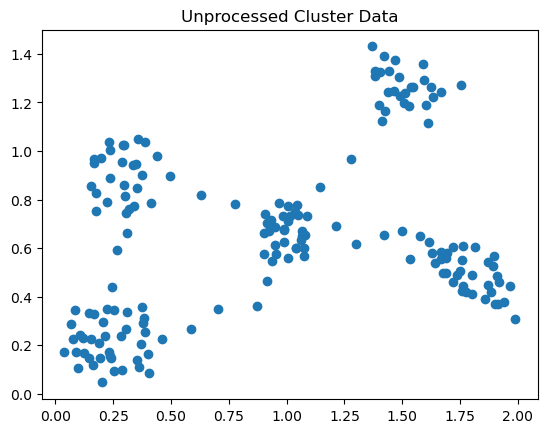

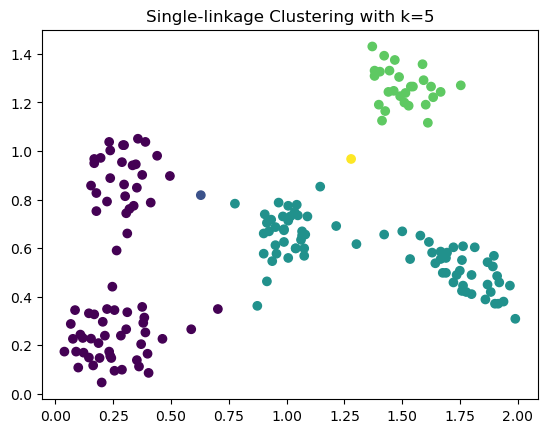

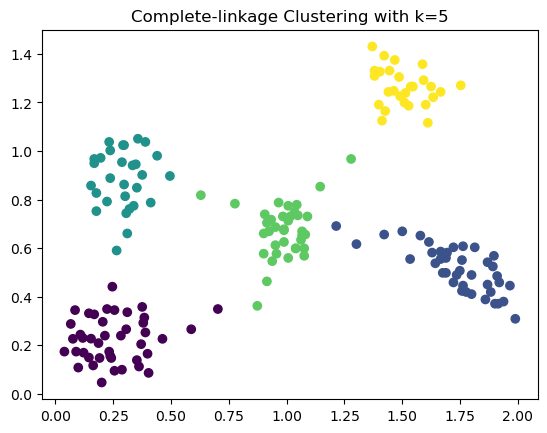

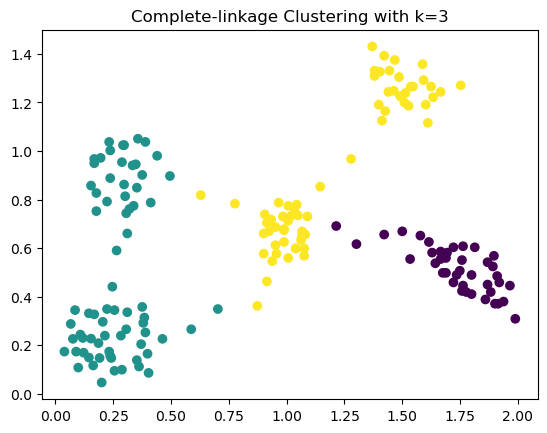

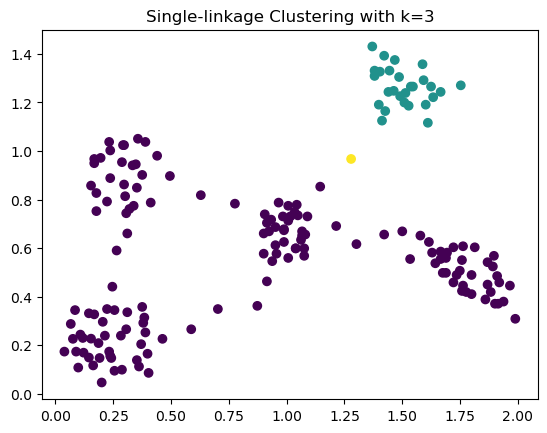

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Read the data.
data = np.loadtxt('points.txt')

# Show unprocessed data set.
fig_cluster = plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.title('Unprocessed Cluster Data')
fig_cluster.canvas.draw()

# Apply Single Linkage Clustering
labels = linkage(data, k=5, complete=False)
unique, inverse, counts = np.unique(labels, return_inverse=True, return_counts=True)
print("Single Linkage Clustering:")
# Print the unqiue labels and their occurence
for u, c in zip(unique, counts):
    print("Label: {:4},  Occurence: {:4}".format(u, c))    
# Replace labels by continuous values starting from 1 for discernible colors in plot
labels = np.arange(1,unique.size+1)[inverse]
fig_single = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Single-linkage Clustering with k=5')
fig_single.canvas.draw()


# Apply Complete Linkage Clustering
labels = linkage(data, k=5, complete=True)
unique, inverse, counts = np.unique(labels, return_inverse=True, return_counts=True)
print("Complete Linkage Clustering:")
for u, c in zip(unique, counts):
    print("Label: {:4},  Occurence: {:4}".format(u, c))    
labels = np.arange(1,unique.size+1)[inverse]
fig_complete = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Complete-linkage Clustering with k=5')
fig_complete.canvas.draw()

# Number of cluster = 3, complete linkage
labels = linkage(data, k=3, complete=True)
unique, inverse, counts = np.unique(labels, return_inverse=True, return_counts=True)
print("Complete Linkage Clustering:")
for u, c in zip(unique, counts):
    print("Label: {:4},  Occurence: {:4}".format(u, c))    
labels = np.arange(1,unique.size+1)[inverse]
fig_complete = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Complete-linkage Clustering with k=3')
fig_complete.canvas.draw()

# Number of cluster = 3, single linkage
labels = linkage(data, k=3, complete=False)
unique, inverse, counts = np.unique(labels, return_inverse=True, return_counts=True)
print("Single Linkage Clustering:")
for u, c in zip(unique, counts):
    print("Label: {:4},  Occurence: {:4}".format(u, c))    
labels = np.arange(1,unique.size+1)[inverse]
fig_complete = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Single-linkage Clustering with k=3')
fig_complete.canvas.draw()


What is the difference between single- and complete-linkage clustering and which is the better solution given the dataset?

The difference between single and complete linkage is that in single we 

# Assignment 3: Kmeans Clustering (5 points)

**a)** Perform K-means clustering to divide the following datset into 2 clusters by hand.

| x1 | x2 |x3 |
|----|----|---|
|  1 | 1  | 1 |
|  2 | 1  | 1 |
|  3 | 1  | 2 |
|  2 | 3  | 4 |
|  5 | 5  | 5 |
|  3 | 2  | 1 |

Start with the following centroids for the two clusters: $(1,1,1)$ and $(5,5,5)$.

YOUR ANSWER HERE

**b)** $k$-mean clustering of a given dataset can result in different outcomes (as can for example be witnessed in Assignment 4). Explain, at which point the algorithms is indeterministic and explain how to compare the quallity of different outcomes.

Algorithm becomes indeterministic in a few situations:

1. When we have one point which has the same distance from two clases. Then it is just random to which cluster points gets assigned.
2. When inital cluster centers are assigned randomly by assigning them to different coorindinates might lead to creation of different clusters, which is indeterministic. 

**c)** The pseudocode for k-means algorithm on (ML-05, slide 27) uses as the termination condition ($\exists k \in[1,K]: \|\vec{w}_k(t)-\vec{w}_k(t-1)\|>\varepsilon$). Discuss this condition from a theoretical and practical perspective and name alternatives.

Theoretical: If there was at least one centroid that was changed more then for value of epsilon, then we continue
Practical: 

# Assignment 4: k-means Clustering (6 points)

## a) Implement k-means clustering. Plot the results for $k = 7$ and $k = 3$ in colorful scatter plots.

How could one handle situations when one or more clusters end up containing 0 elements? Handle these situtation in your code.

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial.distance import cdist

def kmeans(data, k=3, seed = 0):
    """
    Applies kmeans clustering to the data using k initial clusters.
    data is expected to be a numpy array of size n*2, 
    n being the amount of observations in the data. This function returns
    the centroids and the labels for the clusters data (1,1,3,5,5,5,...)
    
    Args:
        data (ndarray): 2-dimensional numpy array
        k (int): Number of clusters
    
    Returns:
        labels (ndarray): Numpy array containing numbers (=labels) with the same order as the data points
        centroids(ndarray): vector representation of cluster centers of shape k*2
    """
     # Checks if a seed is provided
    if seed != 0:
        np.random.seed(seed)  #If a seed is provided we use it to create recreatabilaty
    
    #randomly adding centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    #array to store the distances
    distances = np.zeros((data.shape[0], k)) 
    
    #labels to which cluster each points belongs to
    labels = np.zeros((data.shape[0]))

    changes = 1000000000
    while(changes > 0.05):
         #calculate distances between each point and centroids
        distances = cdist(data, centroids)
    
        #label each data point
        labels = np.argmin(distances, axis = 1)
    
        #calculate new centroids
        previous_centroid = centroids.copy()
        for i in range(k):
            centroids[i] = np.mean(data[labels == i], axis = 0)
            
        changes = np.sum([abs(centroids[i]-previous_centroid[i]) for i in range(k)])
    return labels, centroids

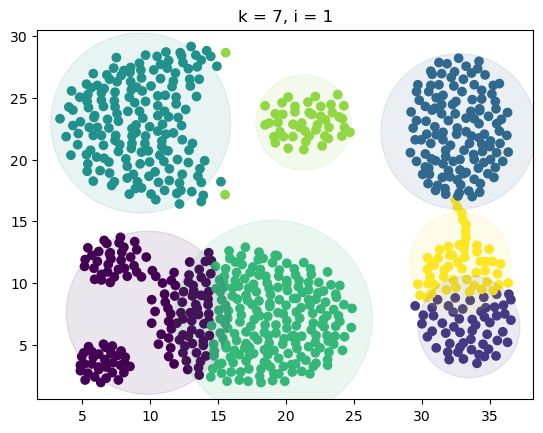

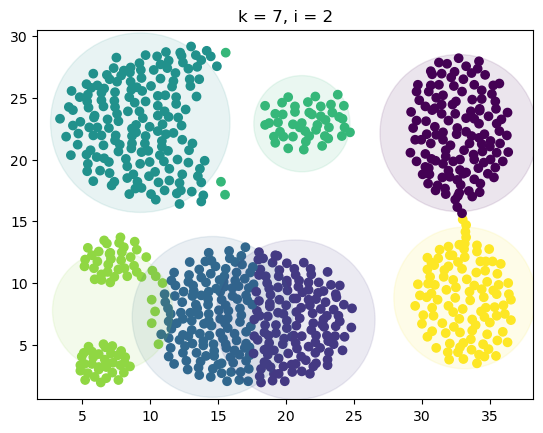

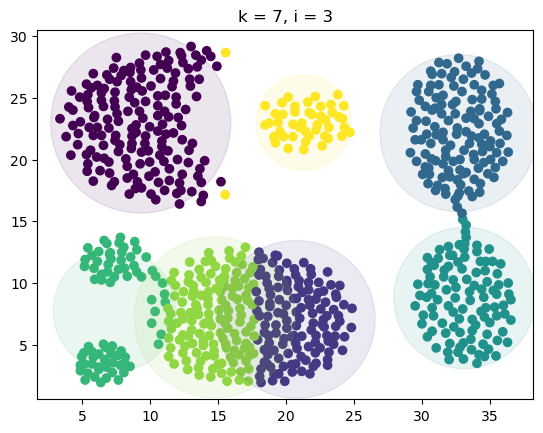

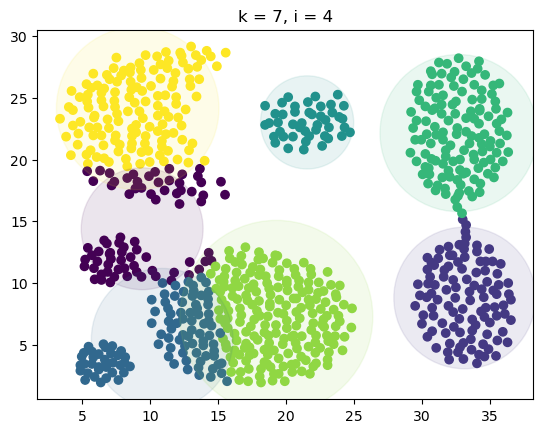

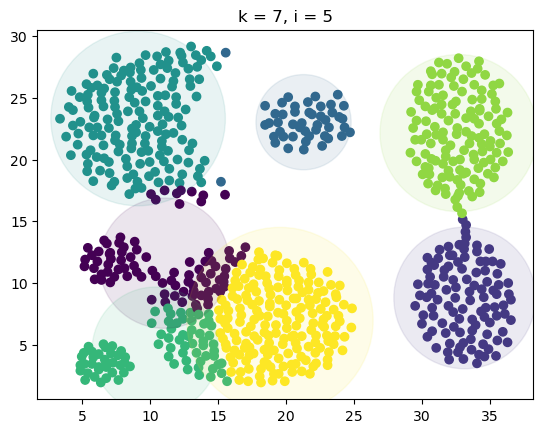

In [59]:
%matplotlib inline

data = np.loadtxt('clusterData.txt')

# Test experiments with a different number of clusters and different 
# number of runs here.
# You can define the number of clusters and how often k-means is called
# allowing to investigate the inlfuenece of the number of clusters and 
# of the different random cluster initializations per run.


# Experiment 1: One run with k=2
#experiment = ((2,1),)
# Experiment 2: One run with k=3, one run with k=7
#experiment = ((3,1),(7,1))
# Experiment 3: Five run with k=7
experiment = ((7,5),)
# Experiment 4: Five run with k=7
#experiment = ((5,5),)


for params in  experiment:
    k = params[0]
    for i in range(1, params[1]+1):
        labels, centroids = kmeans(data, k)
        
        assert isinstance(labels, np.ndarray), "'labels' should be a numpy array!"       
        assert isinstance(centroids, np.ndarray), "'centroids' should be a numpy array!"    
        assert labels.shape==(data.shape[0],), "Each data point needs a label!"
        assert centroids.shape==(k,data.shape[1]), ("k centroids with the same dimensionality "
            "as the data are needed!")
        
        kmeans_fig = plt.figure('k-means with k={}, i={}'.format(k,i))
        plt.scatter(data[:,0], data[:,1], c=labels)
        plt.scatter(centroids[:,0], centroids[:,1], 
                    c=list(set(labels)), alpha=.1, marker='o',
                    s=np.array([len(labels[labels==label]) for label in set(labels)])*100)
        plt.title('k = {}, i = {}'.format(k, i))
        kmeans_fig.canvas.draw()
        plt.show()   

## b) Why might the clustering for k=7 not look optimal? 
What happens if you run the algorithm several times?

YOUR ANSWER HERE